## 各種ライブラリのインポート

In [2]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

import tensorflow as tf
%matplotlib inline

## シード値の設定

In [3]:
random.seed(0)

## 各種値の設定

In [4]:
#乱数の係数
random_factor = 0.05
#サイクルあたりのステップ数
steps_per_cycle = 50
#生成するサイクル数
number_of_cycles = 100

In [5]:
df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles+1),columns = ['t'])
df.tail()

,t
4996,4996
4997,4997
4998,4998
4999,4999
5000,5000


In [6]:
df['sin_t'] = df.t.apply(lambda x: math.sin(x * (2* math.pi/steps_per_cycle)) + random.uniform(-1.0, +1.0)*random_factor)
True_sin = [math.sin(x * (2 * math.pi / steps_per_cycle)) for x in range(steps_per_cycle * number_of_cycles +1)]

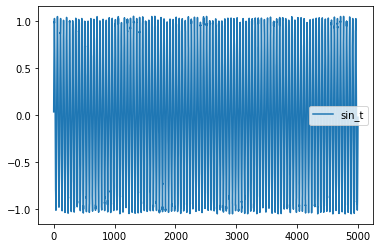

In [7]:
df[['sin_t']].plot()

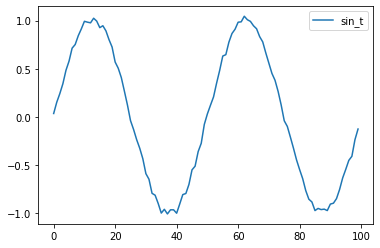

In [8]:
df[['sin_t']].head(steps_per_cycle * 2).plot()

In [9]:
def _load_data(data, n_prev = 100):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].values)
        docY.append(data.iloc[i+n_prev].values)
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1, n_prev = 100):  
    """
    This just splits data to training and testing parts
    """
    ntrn = round(len(df) * (1 - test_size))
    ntrn = int(ntrn)
    X_train, y_train = _load_data(df.iloc[0:ntrn], n_prev)
    X_test, y_test = _load_data(df.iloc[ntrn:], n_prev)

    return (X_train, y_train), (X_test, y_test)

In [10]:
length_of_sequences = 100
(X_train, y_train), (X_test, y_test) = train_test_split(df[["sin_t"]], n_prev =length_of_sequences)  

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4401, 100, 1)
(4401, 1)
(400, 100, 1)
(400, 1)


In [76]:
in_out_neurons = 1
hidden_neurons = 100

model = tf.keras.Sequential()  
model.add(tf.keras.layers.LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False))
model.add(tf.keras.layers.Dense(in_out_neurons, activation='linear'))
model.compile(loss="mean_squared_error", optimizer="Adam")
model.fit(X_train, y_train, batch_size=400, epochs=10, validation_split=0.05) 

Epoch 1/10
11/11 [==============================] - 2s 201ms/step - loss: 0.2844 - val_loss: 0.0764
Epoch 2/10
11/11 [==============================] - 2s 176ms/step - loss: 0.0296 - val_loss: 0.0049
Epoch 3/10
11/11 [==============================] - 2s 174ms/step - loss: 0.0085 - val_loss: 0.0039
Epoch 4/10
11/11 [==============================] - 2s 175ms/step - loss: 0.0031 - val_loss: 0.0020
Epoch 5/10
11/11 [==============================] - 2s 175ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 6/10
11/11 [==============================] - 2s 178ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/10
11/11 [==============================] - 2s 183ms/step - loss: 0.0012 - val_loss: 9.6094e-04
Epoch 8/10
11/11 [==============================] - 2s 178ms/step - loss: 0.0011 - val_loss: 8.8708e-04
Epoch 9/10
11/11 [==============================] - 2s 176ms/step - loss: 0.0011 - val_loss: 8.6643e-04
Epoch 10/10
11/11 [==============================] - 2s 173ms/step - loss: 0.0010 - val_

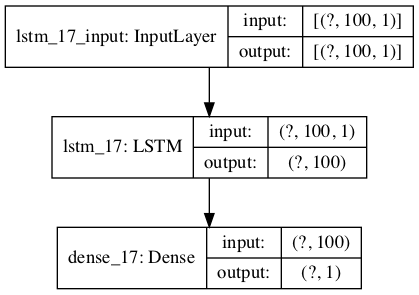

In [77]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

In [78]:
predicted = model.predict(X_test) 

print(max(predicted))

[1.014987]


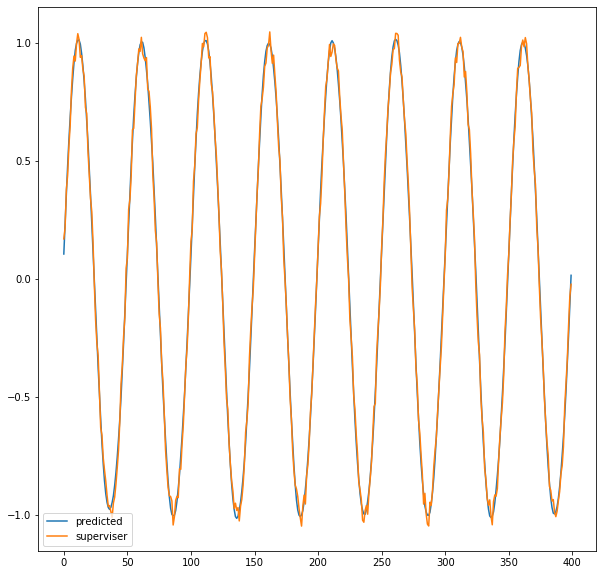

In [79]:
dataf =  pd.DataFrame(predicted[:400])
dataf.columns = ["predicted"]
dataf["superviser"] = y_test[:400]
dataf.plot(figsize=(10, 10))

In [71]:
pre = model.predict(X_train)

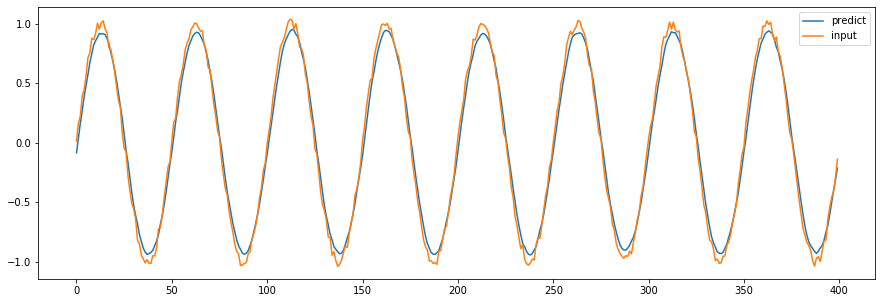

In [72]:
dataf =  pd.DataFrame(pre[:400])
dataf.columns = ["predict"]
dataf["input"] = y_train[:400]
dataf.plot(figsize=(15, 5))

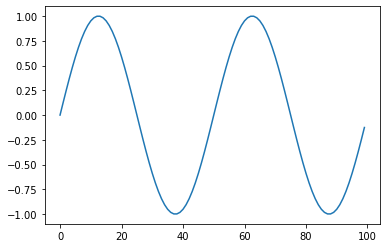

In [37]:
plt.plot(True_sin[0:100])